### Equation of LinearRegression

y = m1x1 + m2x2 + m2x3 + .... + mnxn 


#### Gradient Descent
1) It is an optimization technique for finding minimum of a function.<br>
2) It is first order iterative optimization<br>
3) It consists of an Objective Function (also known as Cost Function or Error Function or Loss Function) that needs to be minimized.<br>
4) Error function determines Error of the model on a given dataset<br>



### Gradient Descent

1) Gradient descent (GD) is an iterative first-order optimisation algorithm used to find a local minimum/maximum of a given function.<br>

2) This method is commonly used in machine learning (ML) and deep learning(DL) to minimise a cost/loss function (e.g. in a linear regression). 

3) Gradient descent algorithm does not work for all functions. There are two specific requirements.
A function has to be:<br>
<b>
a) differentiable<br>
b) convex<br>
</b>    

4) If a function is differentiable it has a derivative for each point in its domain
Ex - <br>
$ f(x) = {x^2}, f(x) = {x^3} - 5x $

5) Second requirement is that function has to be convex. For a univariate function, this means that the line segment connecting two function’s points lays on or above its curve (it does not cross it). If it does it means that it has a local minimum which is not a global one.

<img src="convex_non_convex.png">

Another way to check mathematically if a univariate function is convex is to calculate the second derivative and check if its value is always bigger than 0.

$ f(x) = {x^2} - x + 3 $

$ \frac {df(x)}{dx}  = 2x - 1 $

$ \frac {d^2f(x)}{dx}  = 2 $

#### Gradient
Intuitively it is a slope of a curve at a given point in a specified direction.

### Gradient Descent
Imagine a valley and a person with no sense of direction who wants to get to the bottom of the valley. He goes down the slope and takes large steps when the slope is steep and small steps when the slope is less steep. He decides his next position based on his current position and stops when he gets to the bottom of the valley which was his goal.

<img src="grad_desc1.png" height="300" width="450">

In [ ]:
# ypred = mx + c
# MSE = Cost Function = Loss Function = Error Function
# MSE = (1/n)*sum((yi - ypred)**2)
# MSE = (1/n)*sum((yi - (mx+c))**2)
# J(m,c) = (1/n)*sum((yi - (mx+c))**2) = Cost Function


### Example of Partial Derivative
<img src="partial_derivative_ex.png" height="500" width="450" align="left">

### Steps to perform Gradient Descent

1) Compute Loss Function<br>
a) Find the difference between the actual y and predicted y value(y = mx + c), for a given x.<br>
b) Square this difference.<br>
c) Find the mean of the squares for every value in X.<br>

<img src="cost_fun.png" height="150" width="250">
<img src="cost_fun2.png" height="150" width="250">

<b>over here $ \bar{y}_{i} $ is the ypred and not y_mean </b>

2) Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good performance.<br>

3) Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value D.

where $ {D}_{m} $ is the value of the partial derivative with respect to m
and $ {D}_{c} $ is the value of the partial derivative with respect to c
<img src="cost_fun2.png" height="150" width="250">
<img src="cost_fun_der1.png" height="250" width="350">
<img src="cost_fun_der2.png" height="150" width="250">

<br>
4) Now we update the current value of m and c using the following equation:

<img src="cost_fun_m_c_update.png" height="150" width="250">

5) We repeat this process until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of m and c that we are left with now will be the optimum values.

In [ ]:
# Assuming 
# m=0.5,c=0

# Iteration1
# ypred = mx +c
# MSE = (1/n)*sum((yi-ypred)**2)
# m_grad = dm = (-2/n)*sum(xi*(yi-ypred))
# c_grad = dc = (-2/n)*sum((yi-ypred))
# m_new = m_old - L*m_grad
# c_new = c_old - L*c_grad

# Iteration 2
# m = m_new, c= c_new
# ypred = (m_new)*x + c_new
# MSE = (1/n)*sum((yi-ypred)**2)
# m_grad = dm = (-2/n)*sum(xi*(yi-ypred))
# c_grad = dc = (-2/n)*sum((yi-ypred))
# m_new = m_old - L*m_grad
# c_new = c_old - L*c_grad

### Learning Rate
There’s an important parameter L which scales the gradient and thus controls the step size. 
In machine learning, it is called learning rate and have a strong influence on performance.<br>

a) The smaller learning rate the longer GD converges, or may reach maximum iteration before reaching the optimum point<br>
b) If learning rate is too big the algorithm may not converge to the optimal point (jump around) or even to diverge completely.<br>

<img src="lr_impact.png" height="300" width="350">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('gd_data.csv')
df.columns = ['x','y']
df.head()

,x,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


#### Q) Create a function to compute MSE (Cost Function) for y based on x using different values of m. 
Consider ypred = m*x<br>
Consider different m = [0,0.5,1,1.5,2,2.5,3]

Plot the coefficients vs mse(cost function) on a scatter chart

In [5]:
def cost_fun(m):
    df['ypred'] = m*df['x']
    df['SSE'] = (df['y'] - df['ypred'])**2
    mse = np.mean(df['SSE'])
    return mse

m =  [0,0.5,1,1.5,2,2.5,3]   
mse_list = []
for i in m:
    mse_list.append(cost_fun(i))
print(mse_list)

[5565.107834490552, 2502.4966449527496, 685.3660499598649, 113.716049511901, 787.5466436088572, 2706.8578322507324, 5871.649615437525]


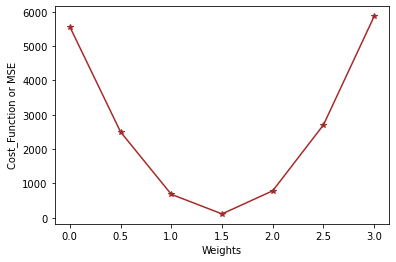

In [9]:
plt.plot(weights,mse_list,marker='*',color='brown')
plt.xlabel('Weights')
plt.ylabel('Cost_Function or MSE')
plt.show()

### Performance of Gradient Descent

<img src="performance_of_grad_desc.png" height="300" width="450" align="left">

In [10]:
df.head()

,x,y,ypred,SSE
0,32.502345,31.707006,97.507036,4329.643943
1,53.426804,68.777596,160.280412,8372.765356
2,61.530358,62.562382,184.591074,14891.001620
3,47.475640,71.546632,142.426919,5024.015037
4,59.813208,87.230925,179.439624,8502.444075


#### Gradient Descent without Library

In [11]:
m,c = 0,0
epochs = 10 # epochs = no of iterations
L = 0.0001
n = len(df['x'])

for i in range(epochs):
    ypred = m*df['x'] + c
    cost = np.mean(df['y'] - ypred)
    m_grad = (-2/n)*sum(df['x']*(df['y'] - ypred))
    c_grad = (-2/n)*sum((df['y'] - ypred))
    m = m - L*m_grad
    c = c - L*c_grad

print(m,c)

1.4774173755485427 0.029639347874941963


In [ ]:
# ypred_res = m*X + c

### SGD (Stochastic Gradient Descent)
1) In SGD, it uses only single sample to perform each iteration.<br>
2) Sample is randomly shuffled and selected for performing iteration<br>
3) SGD reaches convergence much faster than GD

### SGDRegressor using Library

In [13]:
x = df[['x']]
y = df['y']
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [14]:
from sklearn.linear_model import SGDRegressor
m1 = SGDRegressor()  # no_of_iterations = 1000, Learning_rate=0.01
m1.fit(x,y)

SGDRegressor()

In [15]:
ypred_m1 = m1.predict(x)
print(ypred_m1)

[3.97436672e+11 6.61207004e+11 7.63359091e+11 5.86187591e+11
 7.41712974e+11 6.82830861e+11 6.45890818e+11 4.83121342e+11
 5.94121731e+11 6.50154336e+11 5.60271130e+11 6.72865271e+11
 5.44442223e+11 7.20979685e+11 7.02811361e+11 6.04847369e+11
 5.51036926e+11 7.47815700e+11 5.62778603e+11 4.77035885e+11
 8.22095469e+11 8.12341515e+11 5.86257793e+11 5.11813186e+11
 6.41269395e+11 7.36136330e+11 7.10157985e+11 7.89644824e+11
 5.76884228e+11 6.25027696e+11 6.46044602e+11 4.36079676e+11
 5.22664724e+11 7.20930136e+11 7.12609117e+11 5.60533338e+11
 7.67971121e+11 4.04892854e+11 4.47023805e+11 4.62650573e+11
 5.49378151e+11 5.33780623e+11 6.18931330e+11 5.40743206e+11
 7.81853401e+11 3.99538046e+11 4.94054793e+11 6.63076115e+11
 4.14604180e+11 8.03405072e+11 4.68249698e+11 5.48709155e+11
 4.99508574e+11 5.13641458e+11 6.31732420e+11 6.82022921e+11
 5.09318288e+11 7.75515397e+11 6.07973604e+11 5.05851161e+11
 5.06851194e+11 6.20358864e+11 6.47991575e+11 6.19717176e+11
 4.11837086e+11 4.863778

In [ ]:
# Regularization
